# Лабораторная работа 5
# Анимация качения треугольника Рело по квадрату

#### Пальцев Вячеслав, 30.04


# Задание 5.1. Начальное положение треугольника Рело и квадрата

# Реализация Задания 5.1

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo
import matplotlib.animation as anim
%matplotlib widget

In [6]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

In [9]:
relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)

In [11]:
vertexes = np.array([
    [-r/2, -r/2],
    [ r/2, -r/2],
    [ r/2,  r/2],
    [-r/2,  r/2],
    [-r/2, -r/2]
])
square_points = []

In [13]:
for i in range(4):
    start = vertexes[i]
    end = vertexes[i + 1]
    x_vals = np.linspace(start[0], end[0], N)
    y_vals = np.linspace(start[1], end[1], N)
    for x, y in zip(x_vals, y_vals):
        square_points.append([x, y])
square = np.array(square_points)

(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

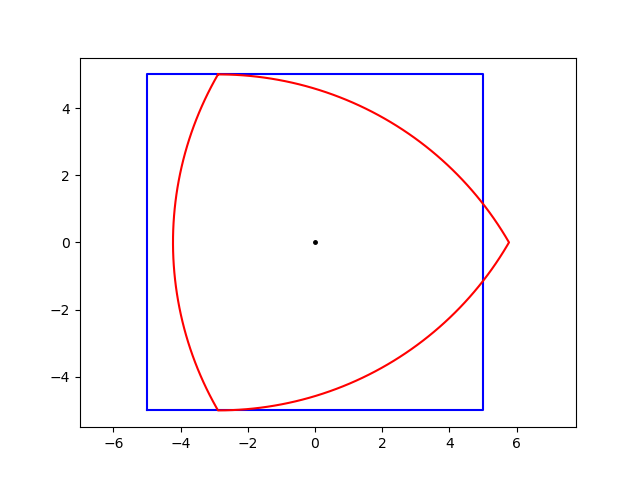

In [15]:
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

In [17]:
shift=[r/(3**(1/2))-r/2,0]

In [19]:
relo_matrix_shifted = relo_matrix - shift
center -= shift

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

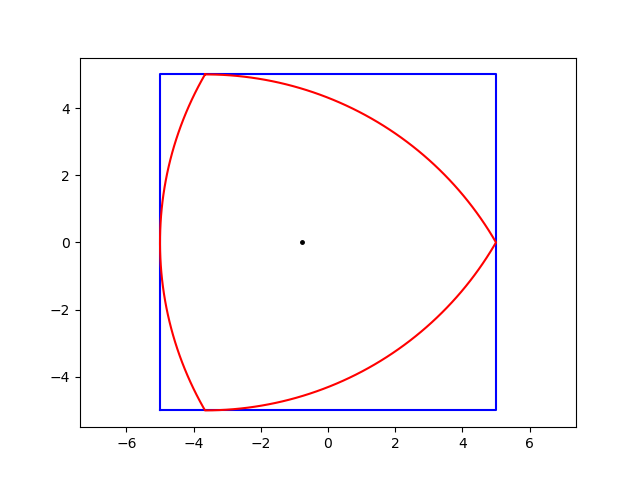

In [21]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

# Задание 5.2. Анимация поступательного движения треугольника Рело по окружности

In [26]:
N_frames = 100
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

In [28]:
N_frames = 100
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

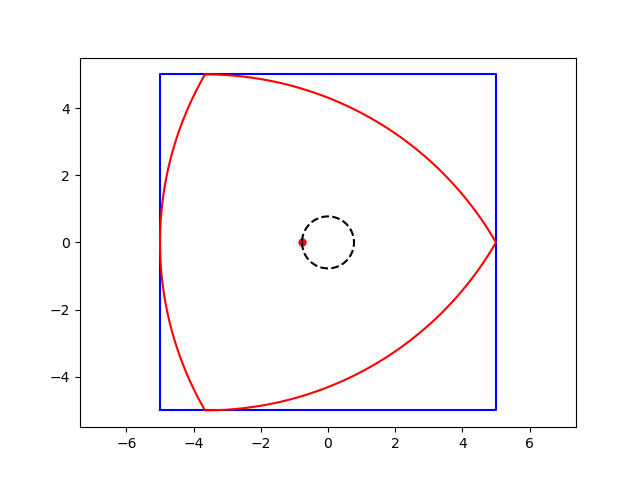

In [30]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

In [32]:
center_frame[0]

array([-7.73502692e-01, -9.47267596e-17])

In [105]:
def draw_frame(r, N_frames, frame=0):
    shift=[r/(3**(1/2))-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

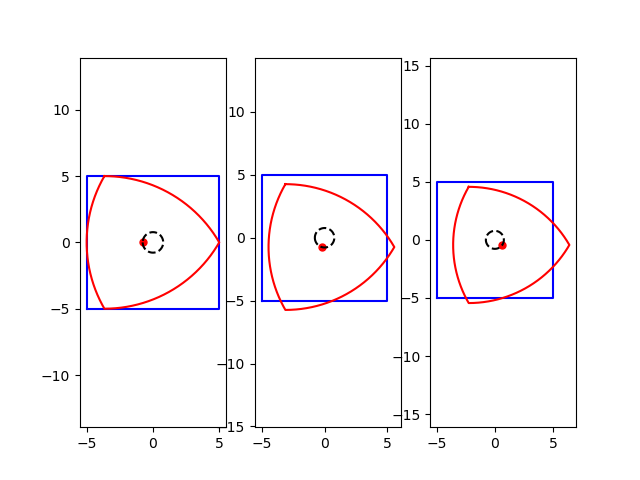

In [36]:
plt.figure()
N_frames = 100
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)


In [38]:
from matplotlib.animation import FuncAnimation

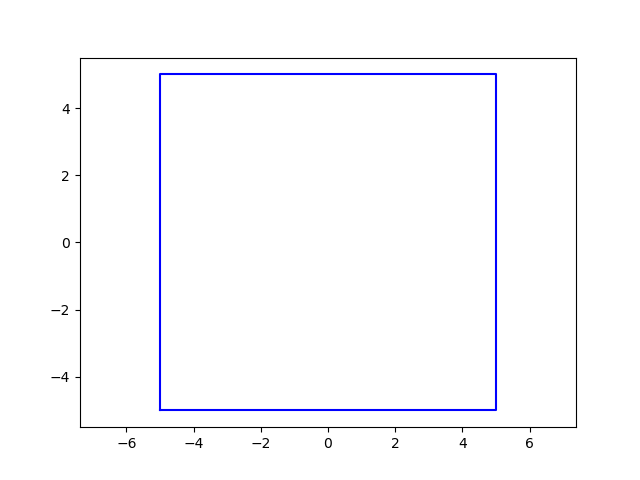

In [74]:
fig1=plt.figure()
ax1 = plt.axes()
plt.axis('equal')
line1, = ax1.plot(square[:,0],square[:,1],'b-') 
line2, = ax1.plot([], [],'go')
line3,=ax1.plot([],[],'r-')
def at_frame(point):
    line2.set_data([point[0]], [point[1]])
    relo_matrix_shifted = relo_matrix+point
    line3.set_data(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1])
def init():
    global line2
    line1, = ax1.plot(square[:,0],square[:,1],'b-') 
    line3,=ax1.plot([],[],'r-')
    line2, = ax1.plot([], [],'go') 
    line4,=ax1.plot(center_frame[0,0],center_frame[0,1],'r.',markersize=10)
    line5,=ax1.plot(center_frame[:,0],center_frame[:,1],'k--')
FuncAnimation(fig1, at_frame, frames=center_frame, init_func=init,repeat=False, interval=20)

# Задание 5.3. Анимация качения треугольника Рело

In [44]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
 [-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

In [46]:
theta = np.pi/3
matrix = rotate_matrix(theta)

In [48]:
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])

(-6.3508529610858835, 6.350852961085886, -5.500000000000005, 5.500000000000001)

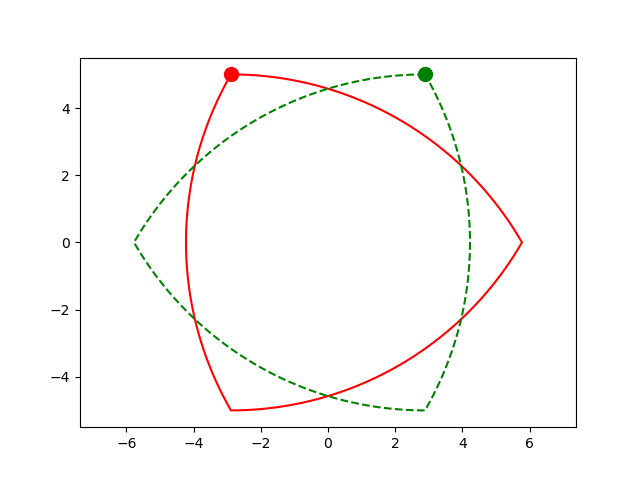

In [50]:
plt.figure()
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

In [52]:
theta = np.linspace(0, 2*np.pi/3, N_frames)

(-5.501735269668723, 5.536440663043177, -5.5002878716042405, 5.506045303689057)

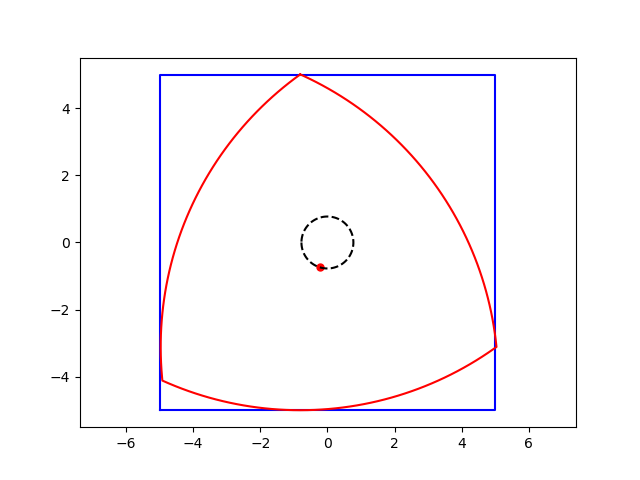

In [56]:
frame = 20
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
 + center_frame[frame])
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

In [58]:
def draw_frame(r, N_frames, frame=0):
    shift=[r/(3**(1/2))-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
     + center_frame[frame])
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

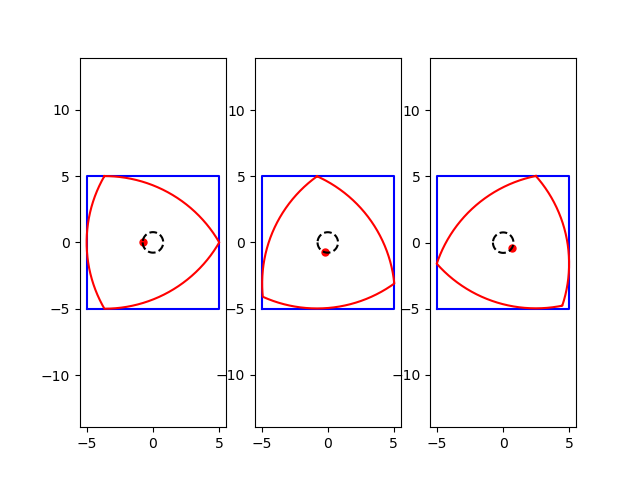

In [60]:
plt.figure()
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)


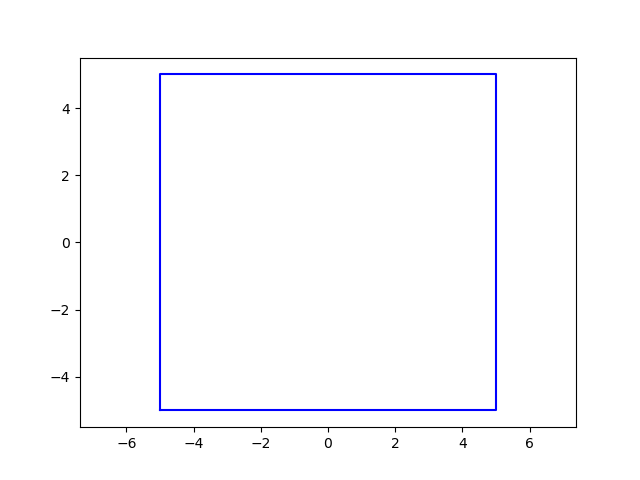

In [86]:
plt.close('all')
fig2=plt.figure()
ax2 = plt.axes()
plt.axis('equal')
line1, = ax2.plot(square[:,0],square[:,1],'b-') # объект для графика функции
line2, = ax2.plot([], [],'go') # объект для точки
line3,=ax2.plot([],[],'r-')
def at_frame2(frame):
    global center_frame
    point=center_frame[frame]
    line2.set_data([point[0]], [point[1]])
    matrix=rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
     + point)
    line3.set_data(relo_matrix_changed[:,0],relo_matrix_changed[:,1])
def init2():
    global line2
    global line3
    line1, = ax2.plot(square[:,0],square[:,1],'b-') # объект для графика функции
    line3,=ax2.plot([],[],'r-')
    line2, = ax2.plot([], [],'go') # объект для точки
    line4,=ax2.plot(center_frame[0,0],center_frame[0,1],'r.',markersize=10)
    line5,=ax2.plot(center_frame[:,0],center_frame[:,1],'k--')
FuncAnimation(fig2, at_frame2, frames=range(N_frames), init_func=init2,repeat=False, interval=20)

In [88]:
plt.close('all')